Look at 2016 House vote margins to estimate effects of gerrymandering
=====================================================================

Data downloaded from 
https://docs.google.com/spreadsheets/d/1oArjXSYeg40u4qQRR93qveN2N1UELQ6v04_mamrKg9g/edit#gid=0

In [1]:
%matplotlib inline

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from scipy.interpolate import interp1d

In [3]:
# Load data
fname ='2016 National House Popular Vote Tracker - Sheet1.csv'
dat = Table.read(fname, format='ascii')

In [4]:
# Define margin, absolute margin, and who holds each seat
gopmargin = np.array([float(x.strip('%')) for x in dat['GOP Margin%'].compressed()])
absmargin = np.abs(gopmargin)
demseats = (gopmargin < 0.)
gopseats = (gopmargin > 0.)

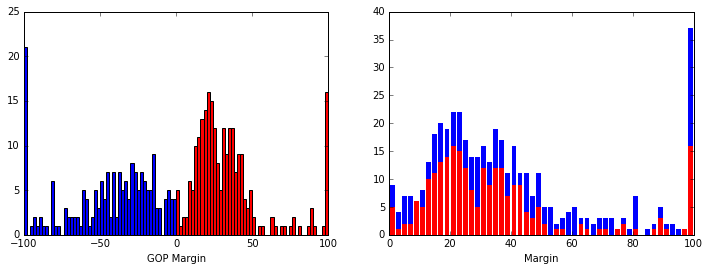

In [5]:
# Plot margin and absolute margin histograms
fig = plt.figure()
figsize = fig.get_size_inches()
figsize[0] *= 2
fig.set_size_inches(figsize)
axmargin = fig.add_subplot(121)
axmargin.hist(gopmargin[gopseats], bins=np.arange(-102, 102, 2), color='red');
axmargin.hist(gopmargin[demseats], bins=np.arange(-102, 102, 2), color='blue')
axmargin.set_xlim(-100,100)
axmargin.set_xlabel('GOP Margin')
axabs = fig.add_subplot(122)
axabs.hist((absmargin[gopseats], absmargin[demseats],), bins=np.arange(-2, 102, 2), stacked=True, color=['red','blue'], linewidth=0);
axabs.set_xlim(0,100)
axabs.set_xlabel('Margin');

Left: Margin by which GOP candidate led next highest candidate. Red are seats where GOP candidate won, blue are seats where Dem candidate won.
Right: Absolute margin of winner.

Conclusions:
    - GOP hold more seats with 20%ish margin (characteristic of gerrymandering), Dems have a much broader distribution.
    - Typical margin for contested seats is 20%.

Plot the CDF to see how many seats each party gets as the electorate moves proportionally in each direction
---------------------------------------------------------------------------------------------------------------

In [6]:
# Discrete CDF function of data
def cdf_gen(data):
    n = len(data)
    cumulat = np.arange(n)+1
    return interp1d(sorted(data), cumulat, bounds_error=False, fill_value=(0,n,))

In [7]:
gopcdf = cdf_gen(-gopmargin[demseats])
demcdf = cdf_gen(gopmargin[gopseats])

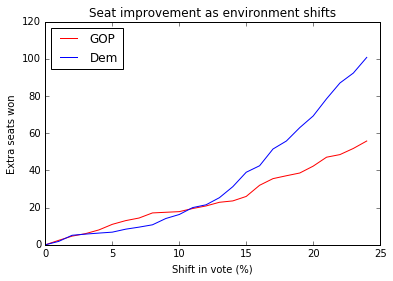

In [8]:
# Plot the CDF.
fig = plt.figure()
ax = fig.add_subplot(111)
xax = np.arange(25)
ax.plot(xax, gopcdf(xax), color='red', label='GOP')
ax.plot(xax, demcdf(xax), color='blue', label='Dem')
ax.set_title('Seat improvement as environment shifts')
ax.set_xlabel('Shift in vote (%)')
ax.set_ylabel('Extra seats won')
ax.legend(loc='best');

Conclusions:
 - As the environment gets more GOP-friendly, they steadily increase their seats, but it takes a very large shift in environment to gain more than 20 sesats.
 - There aren't many seats that are easy pickups for the Democrats, so they don't gain much until the shift gets to about 8%. But there are a large number of GOP seats held by 8-25%, so the pickups rise dramatically beyond especially 10%. That is really what would result in a wave election.